In [26]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [29]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [31]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [32]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler and transform the data
scaled_data = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [33]:
# Create a list with the number of k-values from 1 to 11
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [34]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k)
    
    # 2. Fit the model to the data using `df_scaled`
    model.fit(df_scaled)
    
    # 3. Append the model.inertia_ to the inertia_values
    inertia_values.append(model.inertia_)

# Print the inertia_values
print(inertia_values)


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120977, 65.302379141625, 52.03884061602038, 43.12850833066568, 37.03118066202834, 32.15924257446669, 28.035593866022175, 23.890044355377952]


In [35]:
# Create a dictionary with the data to plot the Elbow curve
data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_inertia = pd.DataFrame(data)

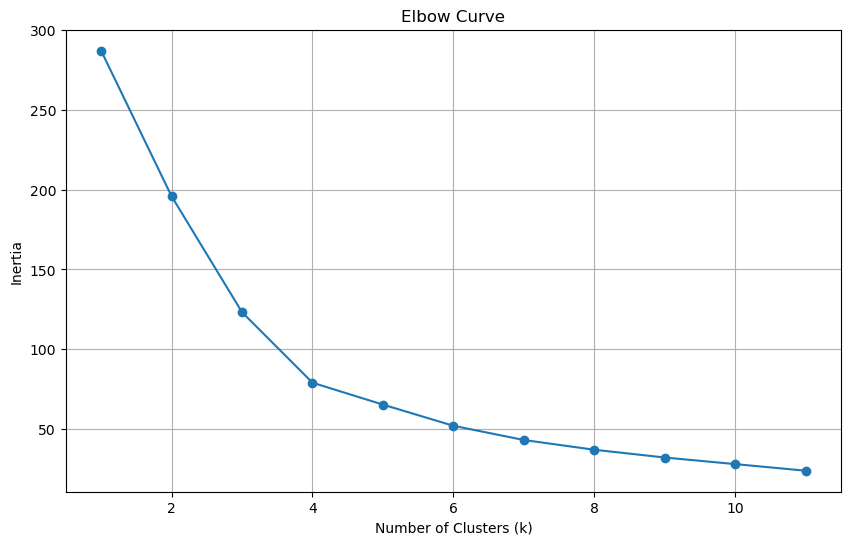

In [36]:

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(df_inertia['k'], df_inertia['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

**Looks like the best value for k is about 4**

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [37]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4)

In [38]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4)

In [39]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(clusters)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [40]:
# Create a copy of the DataFrame
df_scaled_copy = df_scaled.copy()

In [41]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_copy['Clusters'] = clusters

# Display sample data
df_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [42]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

crypto_k_plot = df_scaled_copy.hvplot.scatter(x='price_change_percentage_24h',
                                             y='price_change_percentage_7d',
                                             hover_cols=['coin_id'],
                                             by='Clusters',
                                             title='Cryptocurrency Clusters',
                                             height=400,
                                             width=600)

crypto_k_plot

:NdOverlay   [Clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [43]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [44]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)

# View the first five rows of the DataFrame. 
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [45]:
# Retrieve the explained variance to determine how much information 
explained_variance = pca.explained_variance_ratio_

# can be attributed to each principal component.
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

In [46]:
# Compute the total explained variance
total_explained_variance = explained_variance.sum()

total_explained_variance

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

**Looks Like The Total Explained Variance is about .9**

In [48]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_pca['coin_id'] = df_scaled.index

# Set the coinid column as index
df_pca = df_pca.set_index('coin_id')

# Display sample data
df_pca.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [50]:
# Create a list with the number of k-values from 1 to 11
pca_k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [51]:
# Create an empty list to store the inertia values
pca_k_inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in pca_k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca)
# 3. Append the model.inertia_ to the inertia list
    pca_k_inertia.append(kmeans.inertia_)

In [52]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {'k': pca_k_values, 'inertia': pca_k_inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_pca_elbow = pd.DataFrame(pca_elbow_data)


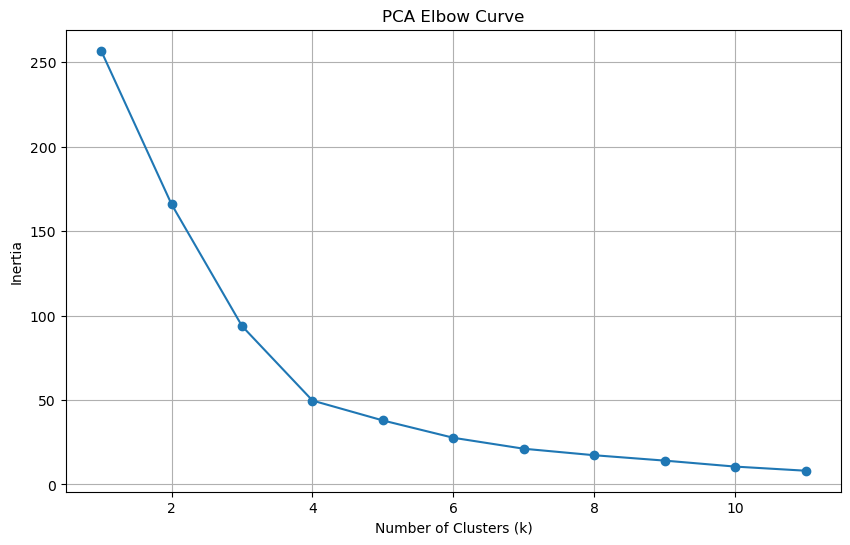

In [53]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_pca_elbow['k'], df_pca_elbow['inertia'], marker='o', linestyle='-')
plt.title('PCA Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k


In [26]:
# Fit the K-Means model using the PCA data

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [28]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 